In [14]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
def spring_motion(x_0, v_0, h, N):
    x_final = np.zeros(N+1)
    v_final = np.zeros(N+1)
    t_final = np.arange(0,N+1)*h
    x[0] = x_0
    v[0] = v_0
    
    x_i = x_0
    v_i = v_0
    
    for n in range(N):
        x_j = x_i + h * v_i
        v_j = v_i - h * x_i
        
        x[n+1] = x_j
        v[n+1] = v_j
        
        x_i = x_j
        v_i = v_j
        
    return (x,v,t)
    

Text(0,0.5,'position')

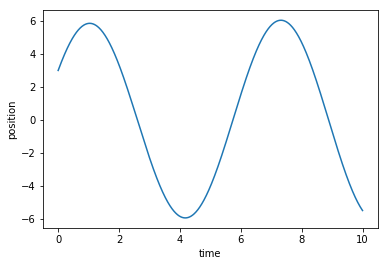

In [4]:
(x,v,t) = spring_motion(3,5,.01,1000)
plt.plot(t,x)
plt.xlabel("time")
plt.ylabel("position")

Text(0,0.5,'velocity')

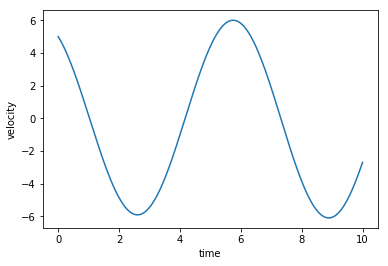

In [5]:
(x,v,t) = spring_motion(3,5,.01,1000)
plt.plot(t,v)
plt.xlabel("time")
plt.ylabel("velocity")

In [6]:
def exact_spring (x_0,v_0,h,N):
    x = np.zeros(N+1)
    v = np.zeros(N+1)
    t = np.arange(0,N+1) * h
    
    x[0] = x_0
    v[0] = v_0
    
    for n in range(N):
        x[n+1] = x_0 * (np.cos(t[n+1])) + v_0 * (np.sin(t[n+1]))
        v[n+1] = -x_0 * (np.sin(t[n+1])) + v_0 * (np.cos(t[n+1]))
    
    return (x,v,t)


Text(0,0.5,'error')

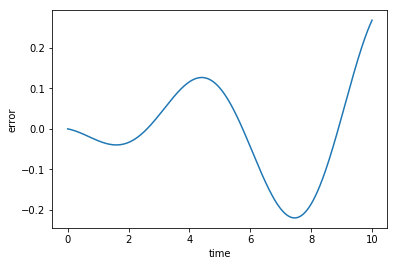

In [7]:
xvt1 = spring_motion(3,5,.01,1000)
xvt2 = exact_spring(3,5,.01,1000)
x = xvt2[0] - xvt1[0]
t = xvt1[2]
plt.plot(t,x)
plt.xlabel("time")
plt.ylabel("error")

Text(0,0.5,'error')

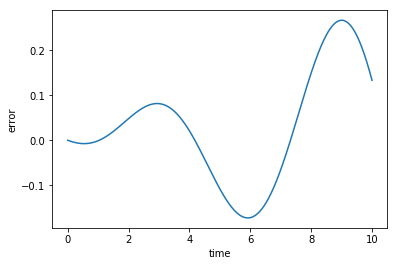

In [8]:
xvt1 = spring_motion(3,5,.01,1000)
xvt2 = exact_spring(3,5,.01,1000)
v = xvt2[1] - xvt1[1]
t = xvt1[2]
plt.plot(t,v)
plt.xlabel("time")
plt.ylabel("error")

In [9]:
def h_prop(x_0,v_0,h_0,N):
    x_diff = np.zeros(6)
    h_values = np.zeros(6)
    for n in range(6):
        h = h_0/2**(n)
        xvt1 = spring_motion(x_0,v_0,h,N)
        xv22 = exact_spring(x_0,v_0,h,N)
        x = xvt2[0] - xvt1[0]
        x_diff[n] = np.amax(x)
        h_values[n] = h
        
    plt.plot(h_values,x_diff)
    plt.xlabel("h_values")
    plt.ylabel("x_diff")

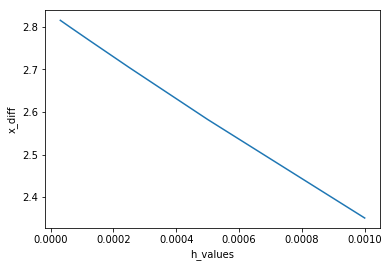

In [10]:
h_prop(3,5,.001,1000)

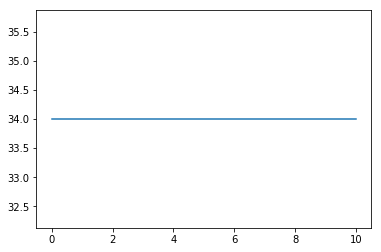

In [11]:
(x,v,t) = exact_spring(3,5,.01,1000)
E = x**(2)+v**(2)
plt.plot(t,E)


In [12]:
# E is constant over a long time frame. There is no error in E.


In [26]:
def implicit(x_0, v_0, h, N):
    x = np.zeros(N+1)
    v = np.zeros(N+1)
    t = np.arange(0,N+1)*h
    x[0] = x_0
    v[0] = v_0
    
    x_i = x_0
    v_i = v_0
    
    for n in range(N):
        x_j = (x_i + h * v_i) / (h**2 + 1)
        v_j = (v_i - h * x_i) / (h**2 + 1)
        
        x[n+1] = x_j
        v[n+1] = v_j
        
        x_i = x_j
        v_i = v_j
        
    return (x,v,t)

Text(0,0.5,'error')

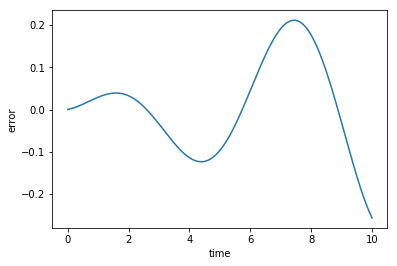

In [28]:
xvt1 = implicit(3,5,.01,1000)
xvt2 = exact_spring(3,5,.01,1000)
x = xvt2[0] - xvt1[0]
t = xvt1[2]
plt.plot(t,x)
plt.xlabel("time")
plt.ylabel("error")

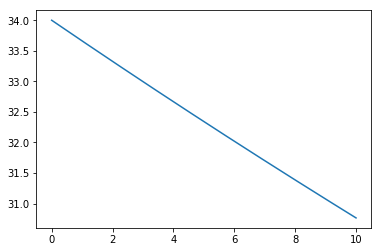

In [29]:
(x,v,t) = implicit(3,5,.01,1000)
E = x**(2)+v**(2)
plt.plot(t,E)


In [30]:
# The error with the implicit Euler function is the same as the explicit, just reflected across y=0. 
# Also energy is not conserved with the implicit method, unlike the explicit method.

Text(0,0.5,'velocity')

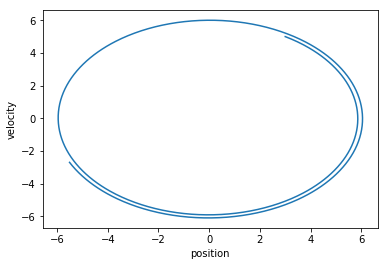

In [31]:
(x,v,t) = spring_motion(3,5,.01,1000)
plt.plot(x,v)
plt.xlabel("position")
plt.ylabel("velocity")

Text(0,0.5,'velocity')

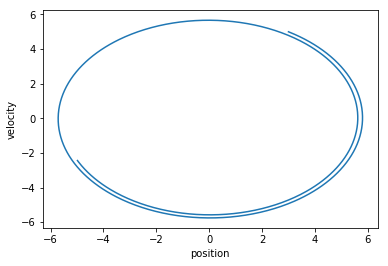

In [32]:
(x,v,t) = implicit(3,5,.01,1000)
plt.plot(x,v)
plt.xlabel("position")
plt.ylabel("velocity")

Text(0,0.5,'velocity')

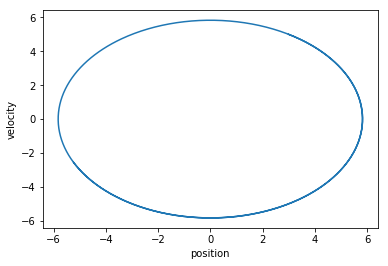

In [33]:
(x,v,t) = exact_spring(3,5,.01,1000)
plt.plot(x,v)
plt.xlabel("position")
plt.ylabel("velocity")

In [34]:
def symplectic(x_0, v_0, h, N):
    x = np.zeros(N+1)
    v = np.zeros(N+1)
    t = np.arange(0,N+1)*h
    x[0] = x_0
    v[0] = v_0
    
    x_i = x_0
    v_i = v_0
    
    for n in range(N):
        x_j = x_i + h * v_i
        v_j = v_i - h * x_j
        
        x[n+1] = x_j
        v[n+1] = v_j
        
        x_i = x_j
        v_i = v_j
        
    return (x,v,t)

Text(0,0.5,'velocity')

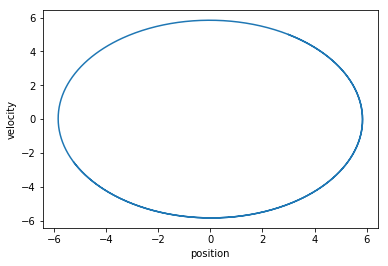

In [35]:
(x,v,t) = symplectic(3,5,.01,1000)
plt.plot(x,v)
plt.xlabel("position")
plt.ylabel("velocity")

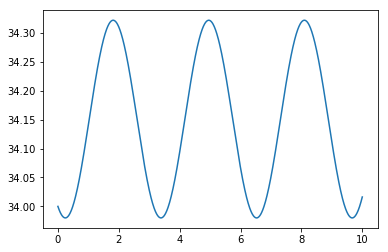

In [36]:
(x,v,t) = symplectic(3,5,.01,1000)
E = x**(2)+v**(2)
plt.plot(t,E)